In [32]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
%store -r features_enc #read the features and labels data from previous notebook
%store -r labels

no stored variable #read the features and labels data from previous notebook


In [4]:
features_enc

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = Calm,Wind Direction = South,Wind Direction = North,Wind Direction = SSE,Wind Direction = SSW,...,PERCENTILE(TemperatureC - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Dew PointC - TemperatureC),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Humidity - TemperatureC)
feature_id,,,,,,,,,,,,,,,,,,,,,
0,2,3.000,70.000,-2.000,"1,019.900",0,0,0,0,0,...,0.103,0.126,0.807,0.223,0.592,0.135,0.514,0.327,0.126,0.658
1,2,3.000,65.000,-3.000,"1,020.900",0,0,0,0,0,...,0.076,0.105,0.821,0.186,0.528,0.102,0.433,0.380,0.101,0.605
2,2,3.000,65.000,-3.000,"1,022.900",0,0,0,0,0,...,0.076,0.112,0.849,0.148,0.528,0.102,0.406,0.380,0.101,0.605
3,2,2.000,65.000,-4.000,"1,024.900",0,0,0,0,0,...,0.072,0.116,0.888,0.104,0.528,0.102,0.378,0.367,0.101,0.615
4,2,1.000,65.000,-5.000,"1,025.300",1,0,0,0,0,...,0.808,0.960,0.903,0.088,0.528,0.798,0.374,0.355,0.945,0.625
5,2,-1.000,75.000,-5.000,"1,026.300",1,0,0,0,0,...,0.779,0.969,0.932,0.078,0.664,0.840,0.494,0.208,0.945,0.772
6,2,-1.000,75.000,-5.000,"1,027.300",1,0,0,0,0,...,0.779,0.974,0.940,0.069,0.664,0.840,0.481,0.208,0.945,0.772
7,2,-1.000,75.000,-5.000,"1,028.300",1,0,0,0,0,...,0.779,0.979,0.949,0.061,0.664,0.840,0.469,0.208,0.945,0.772
8,2,-1.000,75.000,-5.000,"1,030.000",1,0,0,0,0,...,0.779,0.986,0.961,0.045,0.664,0.840,0.447,0.208,0.945,0.772


In [5]:
features_enc['Targets'] = labels

In [6]:
features_targets = features_enc
features_targets

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = Calm,Wind Direction = South,Wind Direction = North,Wind Direction = SSE,Wind Direction = SSW,...,PERCENTILE(Sea Level PressurehPa - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Dew PointC - TemperatureC),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),Targets
feature_id,,,,,,,,,,,,,,,,,,,,,
0,2,3.000,70.000,-2.000,"1,019.900",0,0,0,0,0,...,0.126,0.807,0.223,0.592,0.135,0.514,0.327,0.126,0.658,142.250
1,2,3.000,65.000,-3.000,"1,020.900",0,0,0,0,0,...,0.105,0.821,0.186,0.528,0.102,0.433,0.380,0.101,0.605,143.000
2,2,3.000,65.000,-3.000,"1,022.900",0,0,0,0,0,...,0.112,0.849,0.148,0.528,0.102,0.406,0.380,0.101,0.605,160.000
3,2,2.000,65.000,-4.000,"1,024.900",0,0,0,0,0,...,0.116,0.888,0.104,0.528,0.102,0.378,0.367,0.101,0.615,166.000
4,2,1.000,65.000,-5.000,"1,025.300",1,0,0,0,0,...,0.960,0.903,0.088,0.528,0.798,0.374,0.355,0.945,0.625,142.500
5,2,-1.000,75.000,-5.000,"1,026.300",1,0,0,0,0,...,0.969,0.932,0.078,0.664,0.840,0.494,0.208,0.945,0.772,139.750
6,2,-1.000,75.000,-5.000,"1,027.300",1,0,0,0,0,...,0.974,0.940,0.069,0.664,0.840,0.481,0.208,0.945,0.772,141.500
7,2,-1.000,75.000,-5.000,"1,028.300",1,0,0,0,0,...,0.979,0.949,0.061,0.664,0.840,0.469,0.208,0.945,0.772,141.750
8,2,-1.000,75.000,-5.000,"1,030.000",1,0,0,0,0,...,0.986,0.961,0.045,0.664,0.840,0.447,0.208,0.945,0.772,139.250


In [8]:
target = 'Targets'

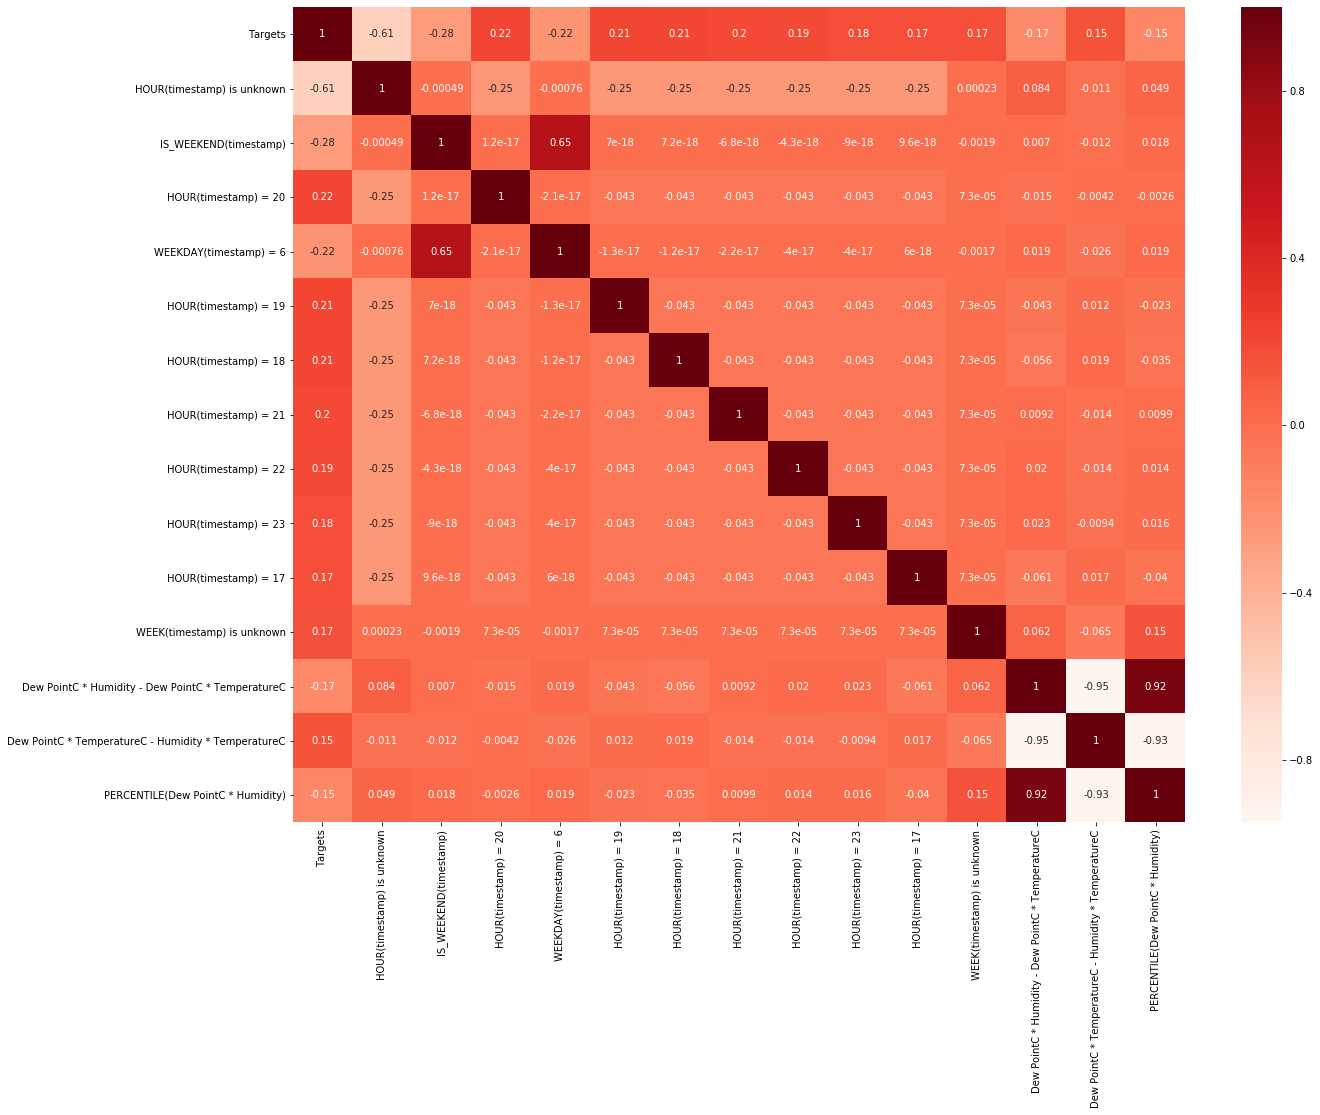

In [28]:
k = 15 #number of variables for heatmap
cols = features_targets.corr().abs().nlargest(k, target).index #Select k columns with the highest absolute correlation with targets
cm = features_targets[cols].corr() #get the correlation of those selected columns
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, cmap = plt.cm.Reds)

In [31]:
#Correlation with targets
cor_target = abs(features_targets.corr()["Targets"])
#Selecting highly correlated features, same as above plot
relevant_features = cor_target[cor_target>0.15]
relevant_features

WEEKDAY(timestamp) = 6                                0.222
HOUR(timestamp) = 23                                  0.177
HOUR(timestamp) = 22                                  0.189
HOUR(timestamp) = 21                                  0.199
HOUR(timestamp) = 20                                  0.223
HOUR(timestamp) = 19                                  0.214
HOUR(timestamp) = 18                                  0.206
HOUR(timestamp) = 17                                  0.171
HOUR(timestamp) is unknown                            0.606
IS_WEEKEND(timestamp)                                 0.277
WEEK(timestamp) is unknown                            0.167
Dew PointC * TemperatureC - Humidity * TemperatureC   0.154
Dew PointC * Humidity - Dew PointC * TemperatureC     0.166
Targets                                               1.000
Name: Targets, dtype: float64

# Filter methods - Removing features with low variance - SKlearn

In [38]:
X = features_enc
print(X.shape)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_Variance = sel.fit_transform(X)
print(X_Variance.shape)
# VarianceThreshold has removed columns with zero-variance more than 80% of the samples

(6576, 2859)
(6576, 2567)


# Filter methods - Univariate feature selection - SKlearn


SelectPercentile removes all but a user-specified highest scoring percentage of features

For regression: f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif


f_regression: Univariate linear regression tests
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

This is done in 2 steps:

The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

It is converted to an F score then to a p-value.
https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2

In [55]:
from sklearn.feature_selection import SelectPercentile, f_regression

In [80]:
y = labels
X_Variance_Percentile = SelectPercentile(f_regression, 5).fit_transform(X_Variance,y)
X_Variance_Percentile.shape

(6576, 129)

In [81]:
X_Variance_Percentile_Scores = pd.DataFrame({'Feature':list(pd.DataFrame(X_Variance).columns),
                                     'Scores':SelectPercentile(f_regression, 20).fit(X_Variance,y).scores_})
X_Variance_Percentile_Scores.sort_values(by='Scores', ascending=False).reset_index(drop=True)
# The feature labels are tramsformed to nemeric index due to the operation of VarianceThreshold

,Feature,Scores
0,2566,"3,700,832,993,791,698,432.000"
1,8,"3,824.151"
2,9,547.879
3,57,188.032
4,1111,185.637
5,840,159.365
6,825,143.893
7,1048,141.985
8,2419,141.752
9,1008,141.700


# Wrapper methods - Recursive feature elimination -SKlearn

In [82]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import warnings
import time
warnings.filterwarnings('ignore')

In [83]:
start = time.time()
rf_r = RandomForestRegressor()
rfe = RFE(estimator=rf_r, step=1,verbose=10)
rfe = rfe.fit(X_Variance_Percentile, y)
end = time.time()
elapsed = end - start 
print('Time for RFE:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
F

In [92]:
X_Variance_Percentile_RFE_Score = pd.DataFrame({'Feature':list(pd.DataFrame(X_Variance_Percentile).columns),
                                      'Ranking':rfe.ranking_})
X_Variance_Percentile_RFE_Score.sort_values(by='Ranking')

,Feature,Ranking
64,64,1
86,86,1
85,85,1
81,81,1
80,80,1
78,78,1
74,74,1
69,69,1
87,87,1
59,59,1


In [98]:
X_Variance_Percentile.shape

(6576, 129)

In [90]:
rf_r.fit(X_Variance_Percentile,y)
rf_r.score(X_Variance_Percentile,y)

0.9999986361336796

In [96]:
X_Variance_Percentile_RFE = rfe.transform(X_Variance_Percentile)
X_Variance_Percentile_RFE.shape

(6576, 64)

In [97]:
rf_r.fit(X_Variance_Percentile_RFE,y)
rf_r.score(X_Variance_Percentile_RFE,y)

0.9999994004550908